In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 讀入 Tensorflow

In [3]:
import tensorflow as tf

### 1. 讀入 MNSIT 數據集

In [4]:
from tensorflow.keras.datasets import fashion_mnist

In [5]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

### 2. 欣賞數據集內容

In [6]:
len(x_train)

60000

In [7]:
len(x_test)

10000

In [8]:
n = 9487

In [9]:
y_train[n]

0

In [10]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

這是 T-shirt/top


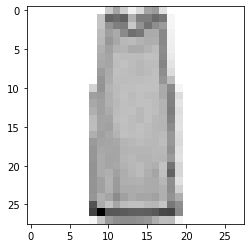

In [11]:
print('這是', class_names[y_train[n]])
plt.imshow(x_train[n], cmap='Greys')

### 3. 資料整理

In [12]:
x_train = x_train.reshape(60000, 784)/255

In [13]:
x_test = x_test.reshape(10000, 784)/255

In [14]:
from tensorflow.keras.utils import to_categorical

In [15]:
y_train = to_categorical(y_train, 10)

In [16]:
y_test = to_categorical(y_test, 10)

In [17]:
y_train[n]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

### 4. 打造神經網路

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [19]:
model = Sequential()

In [20]:
model.add(Dense(200, input_dim=784, activation='relu'))

In [21]:
model.add(Dense(200, activation='relu'))

In [22]:
model.add(Dense(100, activation='relu'))

In [23]:
model.add(Dense(10, activation='softmax'))

### 5. 組裝我們的神經網路

In [24]:
model.compile(loss='mse', optimizer=SGD(lr=0.01), metrics=['accuracy'])

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 200)               157000    
_________________________________________________________________
dense_1 (Dense)              (None, 200)               40200     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1010      
Total params: 218,310
Trainable params: 218,310
Non-trainable params: 0
_________________________________________________________________


### 5. 訓練

In [27]:
model.fit(x_train, y_train, batch_size=25, epochs=40)

Train on 60000 samples
Epoch 1/40
60000/60000 [==============================] - 10s 175us/sample - loss: 0.0819 - accuracy: 0.3591
Epoch 2/40
60000/60000 [==============================] - 10s 164us/sample - loss: 0.0582 - accuracy: 0.6225
Epoch 3/40
60000/60000 [==============================] - 10s 163us/sample - loss: 0.0444 - accuracy: 0.6915
Epoch 4/40
60000/60000 [==============================] - 11s 176us/sample - loss: 0.0387 - accuracy: 0.7473
Epoch 5/40
60000/60000 [==============================] - 8s 140us/sample - loss: 0.0348 - accuracy: 0.7768
Epoch 6/40
60000/60000 [==============================] - 9s 149us/sample - loss: 0.0321 - accuracy: 0.7929
Epoch 7/40
60000/60000 [==============================] - 11s 184us/sample - loss: 0.0302 - accuracy: 0.8047
Epoch 8/40
60000/60000 [==============================] - 13s 210us/sample - loss: 0.0287 - accuracy: 0.8126
Epoch 9/40
60000/60000 [==============================] - 11s 192us/sample - loss: 0.0276 - accuracy: 0.818

### 6. 訓練成果

In [28]:
result = model.predict_classes(x_test)

神經網路預測是: Shirt


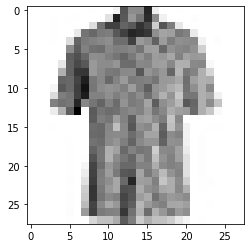

In [32]:
n = 8756
print('神經網路預測是:', class_names[result[n]])
# print('真正的答案是:', [y_test[n]])
plt.imshow(x_test[n].reshape(28,28), cmap='Greys')
